In [1]:
import sys
 
# setting path
sys.path.append('../')

from utils.dataloaders import MIDIEvalDataLoader
from utils.display import display_dicom

from pathlib import Path

In [2]:
root_data_dir = '/home/r079a/Desktop/de-identification/dataset'

loader = MIDIEvalDataLoader(
    rawimagespath=Path(root_data_dir, 'images/manifest-1617826555824'),
    deidimagespath=Path(root_data_dir, 'images-2/manifest-1617826161202'),
    uidsmappath=Path(root_data_dir, 'Pseudo-PHI-DICOM-Dataset-uid_crosswalk.csv'),
)

In [3]:
(rawdcm, metadata), (deiddcm, deiddcm_metadata) = loader.get_raw_n_deid_patient(8, include_metadata=True)

{'Series UID': '2.25.266330404550956556941727606810649148918', 'Collection': 'Pseudo-PHI-DICOM-Data', '3rd Party Analysis': 'NO', 'Data Description URI': 'https://doi.org/10.7937/s17zr072', 'Subject ID': 6451050561, 'Study UID': '2.25.332499716250305887681441969149281156598', 'Study Description': nan, 'Study Date': '07-28-1961', 'Series Description': 'PET IR CTAC WB', 'Manufacturer': 'GE MEDICAL SYSTEMS', 'Modality': 'PT', 'SOP Class Name': 'Positron Emission Tomography Image Storage', 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.128', 'Number of Images': 175, 'File Size': '6.69 MB', 'File Location': './Pseudo-PHI-DICOM-Data/6451050561/07-28-1961-NA-NA-56598/PET IR CTAC WB-48918', 'Download Timestamp': '2024-06-03T18:21:12.666'}


In [4]:
deiddcm_metadata

{'Series UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.247682086785082569558263857709',
 'Collection': 'Pseudo-PHI-DICOM-Data',
 '3rd Party Analysis': 'NO',
 'Data Description URI': 'https://doi.org/10.7937/s17zr072',
 'Subject ID': 'Pseudo-PHI-008',
 'Study UID': '1.3.6.1.4.1.14519.5.2.1.8700.9668.178510714460248717553766553500',
 'Study Description': nan,
 'Study Date': '07-11-1951',
 'Series Description': 'PET IR CTAC WB',
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'Modality': 'PT',
 'SOP Class Name': 'Positron Emission Tomography Image Storage',
 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.128',
 'Number of Images': 175,
 'File Size': '6.81 MB',
 'File Location': './Pseudo-PHI-DICOM-Data/Pseudo-PHI-008/07-11-1951-NA-NA-53500/PET IR CTAC WB-57709',
 'Download Timestamp': '2024-06-03T18:25:41.214'}

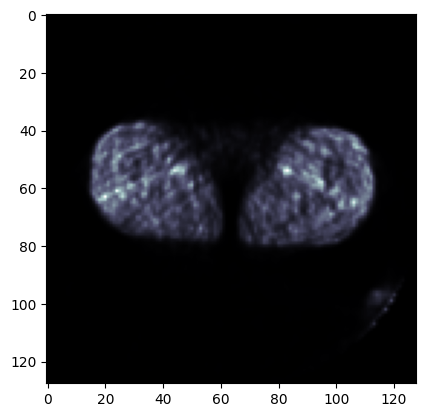

In [5]:
display_dicom(rawdcm[0])

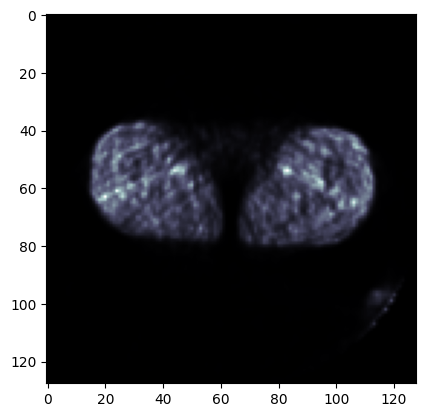

In [6]:
display_dicom(deiddcm[0])

In [7]:
# for element in rawdcm[0]:
#     if element.VR == 'OW' or element.VR == 'UI':
#         continue
        
#     thisval = element.value
#     deidval = ''
#     if element.tag in deiddcm[0]:
#         deidval = deiddcm[0][element.tag].value

#     if deidval != thisval:
#         print(element.tag, element.name, element.VR)
#         print(f"{thisval} --> {deidval}")

In [8]:
from dicomanonymizer.anonymizer import anonymize
from pathlib import Path
import os

In [9]:
rootdir = '/home/r079a/Desktop/de-identification/'

raw_img_path = Path(rootdir, 'dataset/images/manifest-1617826555824', metadata['File Location'])
output_path = Path(rootdir, 'dicom-output')

In [10]:
first_dcm_name = os.listdir(raw_img_path)[0]
first_dcm_name

'1-001.dcm'

In [11]:
anonymize(
    Path(raw_img_path, first_dcm_name), output_path, {}, True,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.52it/s]


In [12]:
from pydicom import dcmread
import pandas as pd

In [13]:
with open(Path(output_path, first_dcm_name), 'rb') as infile:
    ds = dcmread(infile)

In [14]:
tagvalues = []
for element in rawdcm[0]:
    if element.VR == 'OW':
        continue
    deidval = "Not available"
    if element.tag in deiddcm[0]:
        deidval = str(deiddcm[0][element.tag].value)
    dcmannonval = "Not available"
    if element.tag in ds:
        dcmannonval = str(ds[element.tag].value)
    changed = False
    # if str(element.value) != deidval or str(element.value) != dcmannonval:
    if str(element.value) != deidval:
        changed = True
    values_tuple = (str(element.tag), element.name, str(element.value), deidval, dcmannonval, changed)
    tagvalues.append(values_tuple)

In [15]:
valus_df = pd.DataFrame(tagvalues, columns =['Tag', 'Name', 'Raw Metadata', 'Ground Truth Anonimization', 'Dicom Anonymizer', 'Changed'])

In [16]:
pd.set_option('display.max_rows', 82)
valus_df[valus_df['Changed']]

,Tag,Name,Raw Metadata,Ground Truth Anonimization,Dicom Anonymizer,Changed
2,"(0008, 0012)",Instance Creation Date,19610728,19510711,00010101,True
4,"(0008, 0014)",Instance Creator UID,2.25.138359208257844712507554962461593026038,1.3.6.1.4.1.14519.5.2.1.8700.9668.156605591388...,2.25.214400920540215237066851640483798611104,True
6,"(0008, 0018)",SOP Instance UID,2.25.53276105529239306645897576484909465078,1.3.6.1.4.1.14519.5.2.1.8700.9668.138466462220...,2.25.42688110604771531389056522649910155688,True
7,"(0008, 0020)",Study Date,19610728,19510711,00010101,True
8,"(0008, 0021)",Series Date,19610728,19510711,00010101,True
9,"(0008, 0022)",Acquisition Date,19610728,19510711,00010101,True
10,"(0008, 0023)",Content Date,19610728,19510711,00010101,True
15,"(0008, 0050)",Accession Number,19610729E532433,,,True
18,"(0008, 0080)",Institution Name,"Daniels, Fowler and Lopez Community Clinic",Not available,ANONYMIZED,True
19,"(0008, 0081)",Institution Address,"226 Shaw Street Apt. 554 West Brittanyton, MO ...",Not available,Not available,True


In [17]:
# targettag = (0x0018,0xa001)
# print(rawdcm[0][targettag].value)
# print(deiddcm[0][targettag].value)
# print(ds[targettag].value)

### Evaluate PS_3_3 Anonymizer

In [18]:
raw_dcm_path = Path(
    rootdir, 
    'dataset/images/manifest-1617826555824/Pseudo-PHI-DICOM-Data/6451050561/07-28-1961-NA-NA-56598/PET IR CTAC WB-48918/1-001.dcm'
)

deid_dcm_path = Path(
    rootdir,
    'dataset/images-2/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-008/07-11-1951-NA-NA-53500/PET IR CTAC WB-57709/1-001.dcm'
)

deidentfied_dcm_path = Path(
    rootdir,
    'dicom-output/6451050561/07-28-1961-NA-NA-56598/PET IR CTAC WB-48918/1-001.dcm'
)

In [19]:
with open(raw_dcm_path, 'rb') as infile:
    raw_dcm = dcmread(infile)

with open(deid_dcm_path, 'rb') as infile:
    deid_dcm = dcmread(infile)

with open(deidentfied_dcm_path, 'rb') as infile:
    deidentfied_dcm = dcmread(infile)

In [20]:
tagvalues = []
for element in raw_dcm:
    if element.VR == 'OW':
        continue
    deidval = "Not available"
    if element.tag in deid_dcm:
        deidval = str(deid_dcm[element.tag].value)
    dcmannonval = "Not available"
    if element.tag in deidentfied_dcm:
        dcmannonval = str(deidentfied_dcm[element.tag].value)
    changed = False
    if str(element.value) != deidval:
        changed = True
    values_tuple = (str(element.tag), element.name, str(element.value), deidval, dcmannonval, changed)
    tagvalues.append(values_tuple)

In [21]:
valus_df = pd.DataFrame(tagvalues, columns =['Tag', 'Name', 'Raw Metadata', 'Ground Truth Anonimization', 'PS 3.3 Anonymizer', 'Changed'])

In [22]:
valus_df[valus_df['Changed']]

,Tag,Name,Raw Metadata,Ground Truth Anonimization,PS 3.3 Anonymizer,Changed
2,"(0008, 0012)",Instance Creation Date,19610728,19510711,19610728,True
4,"(0008, 0014)",Instance Creator UID,2.25.138359208257844712507554962461593026038,1.3.6.1.4.1.14519.5.2.1.8700.9668.156605591388...,2.25.295743069430476675743878097336980564937,True
6,"(0008, 0018)",SOP Instance UID,2.25.53276105529239306645897576484909465078,1.3.6.1.4.1.14519.5.2.1.8700.9668.138466462220...,2.25.253616234691800901827465496771127321911,True
7,"(0008, 0020)",Study Date,19610728,19510711,19611125,True
8,"(0008, 0021)",Series Date,19610728,19510711,19611125,True
9,"(0008, 0022)",Acquisition Date,19610728,19510711,19611125,True
10,"(0008, 0023)",Content Date,19610728,19510711,19611125,True
15,"(0008, 0050)",Accession Number,19610729E532433,,,True
18,"(0008, 0080)",Institution Name,"Daniels, Fowler and Lopez Community Clinic",Not available,and,True
19,"(0008, 0081)",Institution Address,"226 Shaw Street Apt. 554 West Brittanyton, MO ...",Not available,Not available,True
